<a href="https://colab.research.google.com/github/mohamedxxhechxxbenxxhadid/tactic_sense/blob/sarra/DataPrepBO1_tectic_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load data
df = pd.read_csv('/content/sample_data/players_22.csv')


<ipython-input-1-ff5daeaad1f7>:11: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/players_22.csv')


In [ ]:
# ========== STEP 2: STATISTICAL ANALYSIS ==========
print("\n=== Summary Statistics ===")
df.describe()


=== Summary Statistics ===


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
# Vérifier combien de valeurs nulles par colonne
print(df.isnull().sum())
print(f"Number of null values : {df.isnull().sum().sum()}")



sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64
Number of null values : 152618


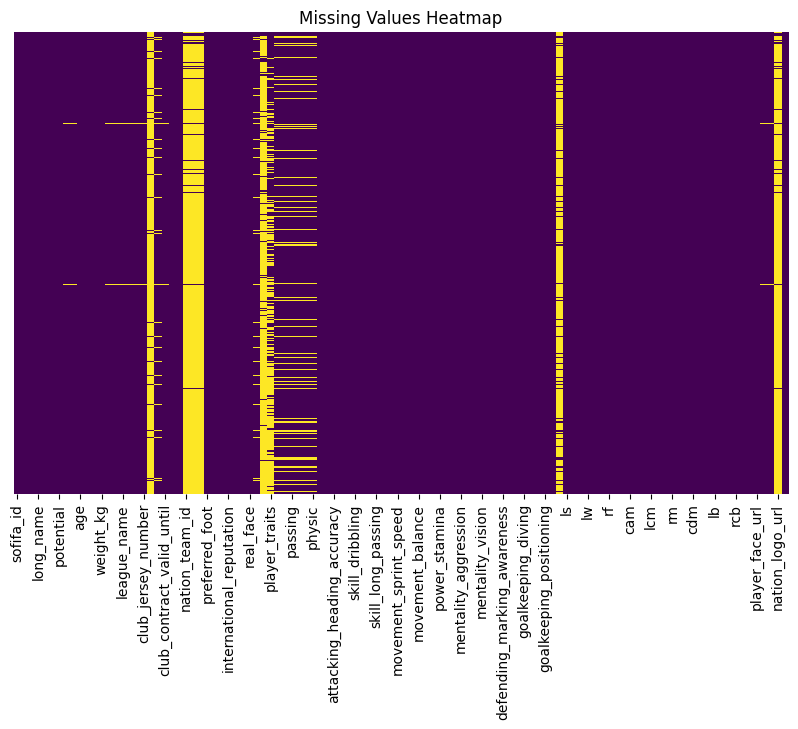

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:


# Identifier les colonnes essentielles pour le modèle
essential_columns = [
    'short_name', 'height_cm', 'weight_kg', 'age',  # Infos d'identification du joueur
    'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling',
    'defending', 'physic', 'attacking_finishing', 'skill_dribbling', 'player_positions',
    'mentality_vision', 'mentality_composure',
    'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type',
    'release_clause_eur', 'club_position', 'defending_standing_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_positioning'
]


# Garder uniquement les lignes où les colonnes essentielles ne sont pas nulles
df_cleaned = df[essential_columns].dropna()

# Vérifier le nombre de lignes après la suppression des valeurs manquantes dans les colonnes essentielles
print(f"Number of rows after cleaning : {df_cleaned.shape[0]}")


Number of rows after cleaning : 16020


**Distribution of Performance Metrics**

In [ ]:
# 📌 1. Statistiques descriptives
df[essential_columns].describe()


,height_cm,weight_kg,age,overall,potential,pace,shooting,passing,dribbling,defending,physic,attacking_finishing,skill_dribbling,mentality_vision,mentality_composure,release_clause_eur,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_positioning
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,19239.000000,19239.000000,19239.000000,19239.000000
mean,181.299704,74.943032,25.210822,65.772182,71.079370,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,45.894433,55.660429,53.964603,57.929830,5.374044e+06,48.045584,16.406102,16.192474,16.229274
std,6.863179,7.069434,4.748235,6.880232,6.086213,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,19.721023,18.784590,13.650481,12.159326,1.494837e+07,21.232718,17.574028,16.839528,17.059779
min,155.000000,49.000000,16.000000,47.000000,49.000000,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,2.000000,4.000000,10.000000,12.000000,1.600000e+04,5.000000,2.000000,2.000000,2.000000
25%,176.000000,70.000000,21.000000,61.000000,67.000000,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,30.000000,50.000000,45.000000,50.000000,8.060000e+05,28.000000,8.000000,8.000000,8.000000
50%,181.000000,75.000000,25.000000,66.000000,71.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,50.000000,61.000000,55.000000,59.000000,1.600000e+06,56.000000,11.000000,11.000000,11.000000
75%,186.000000,80.000000,29.000000,70.000000,75.000000,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000,62.000000,68.000000,64.000000,66.000000,3.700000e+06,65.000000,14.000000,14.000000,14.000000
max,206.000000,110.000000,54.000000,93.000000,95.000000,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000,95.000000,96.000000,95.000000,96.000000,3.735000e+08,93.000000,91.000000,92.000000,92.000000


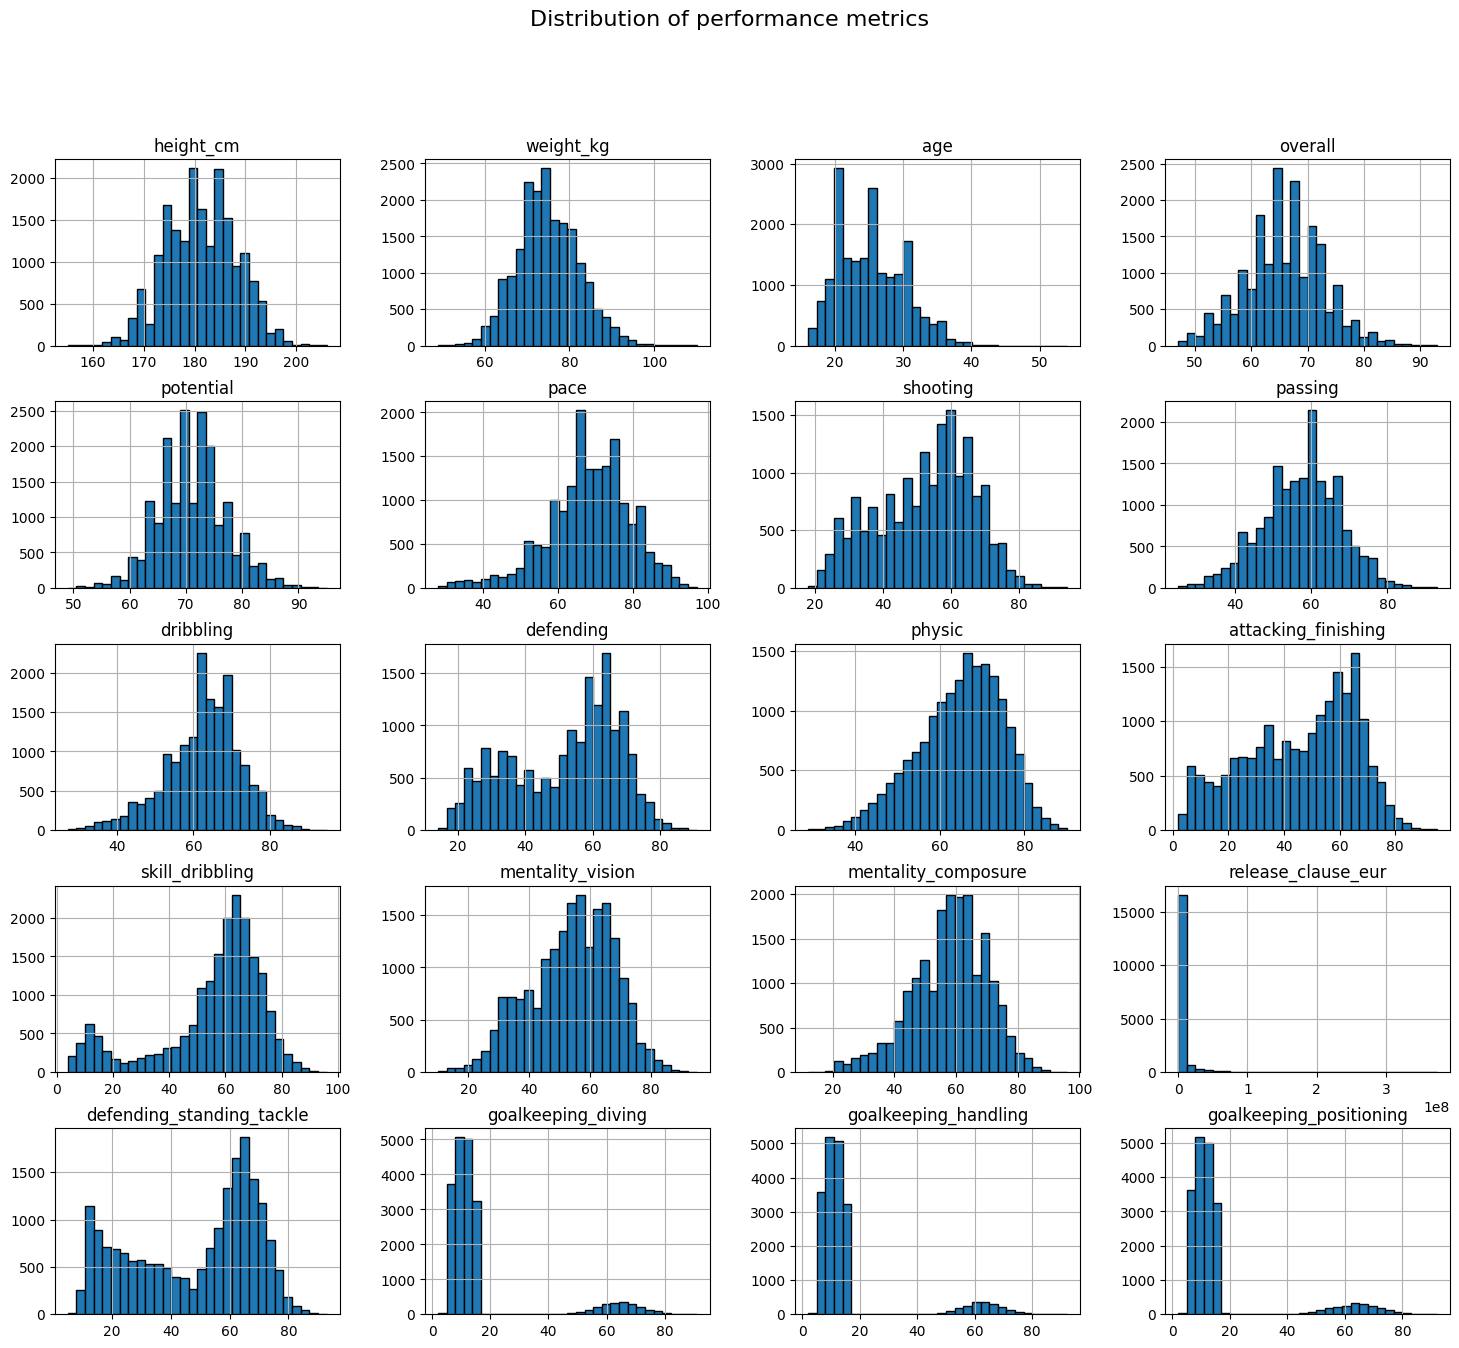

In [ ]:
# 📌 2. Histogrammes pour voir la distribution
df[essential_columns].hist(figsize=(18,15), bins=30, edgecolor='black')
plt.suptitle("Distribution of performance metrics", fontsize=16)
plt.show()

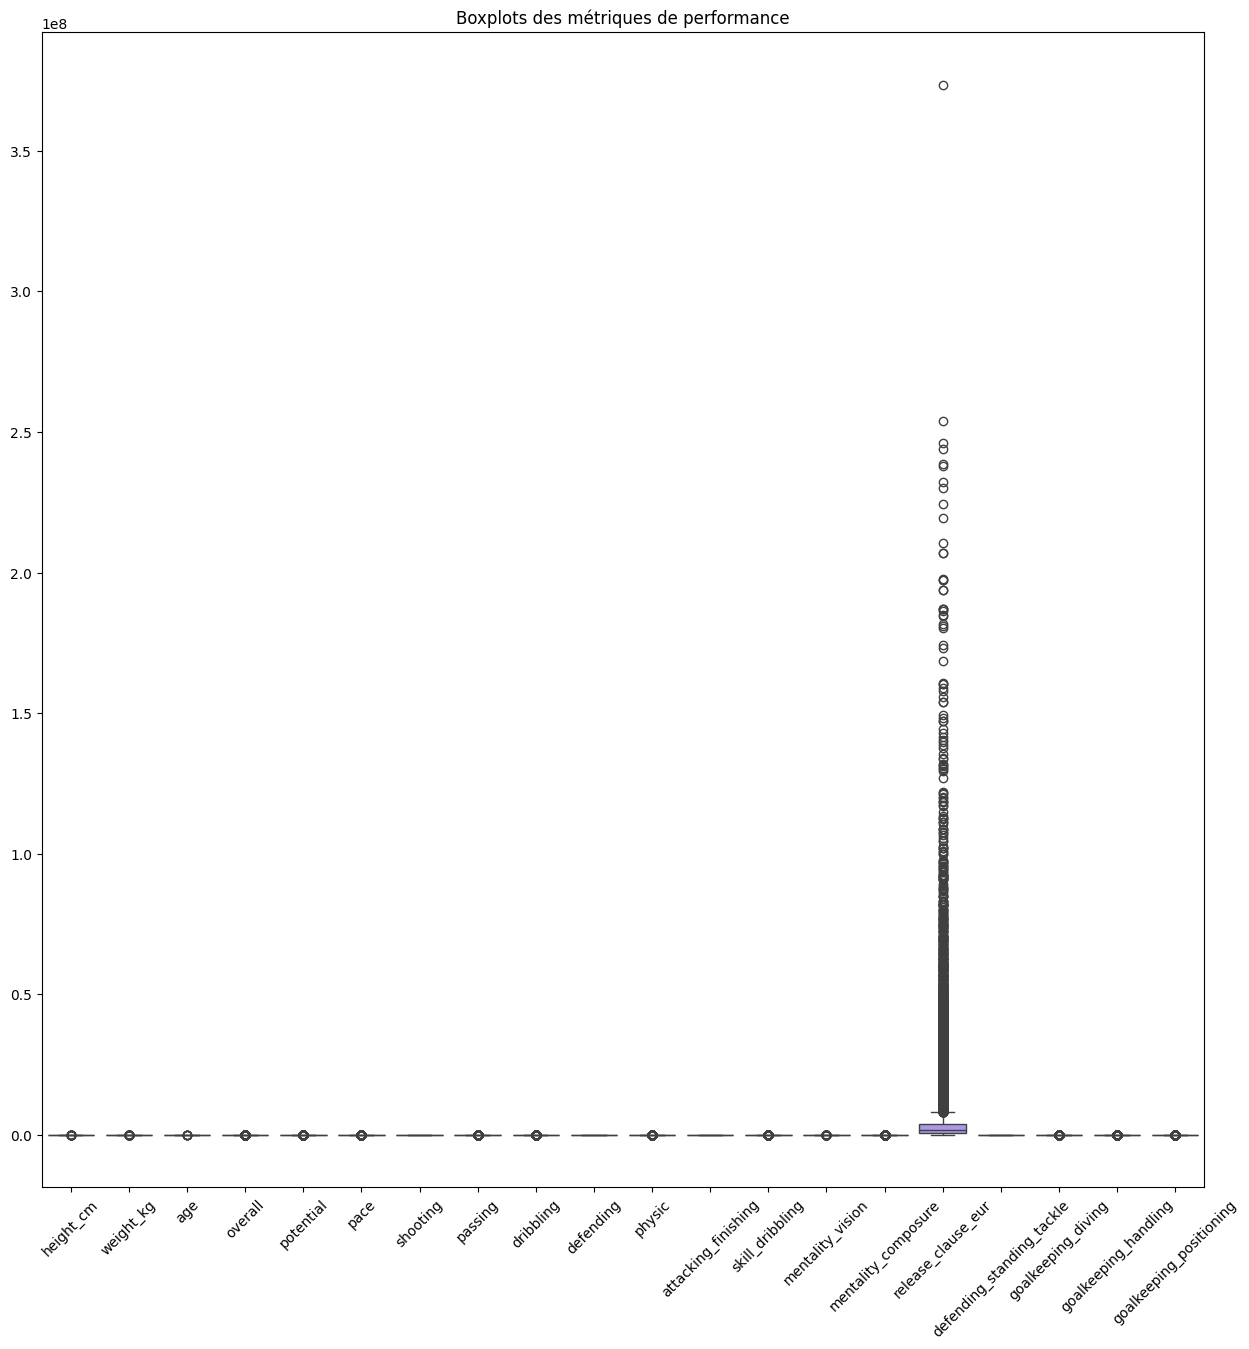

In [ ]:
# 📌 3. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[essential_columns])
plt.xticks(rotation=45)
plt.title("Boxplots des métriques de performance")
plt.show()

Ratio de potentiel par rapport à la note globale :ce ratio est valable pour tous les joueurs, indépendamment de leur poste.


In [ ]:

df_cleaned['potential_to_overall_ratio'] = df_cleaned['potential'] / df_cleaned['overall']


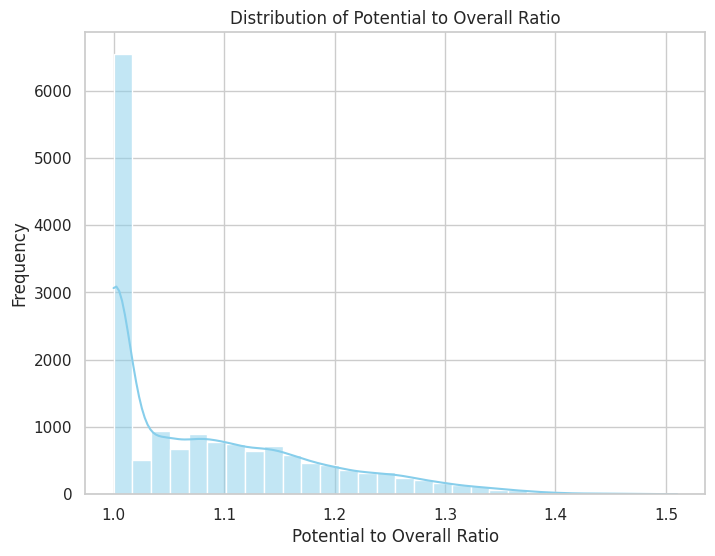

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for potential_to_overall_ratio
sns.histplot(df_cleaned['potential_to_overall_ratio'], bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Potential to Overall Ratio')
plt.xlabel('Potential to Overall Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Analyse de l'âge par rapport au physique : L'âge d'un joueur a une importance cruciale sur son physique
, indépendamment du poste.

In [ ]:
df_cleaned['age_to_physic_ratio'] = df_cleaned['age'] / df_cleaned['physic']


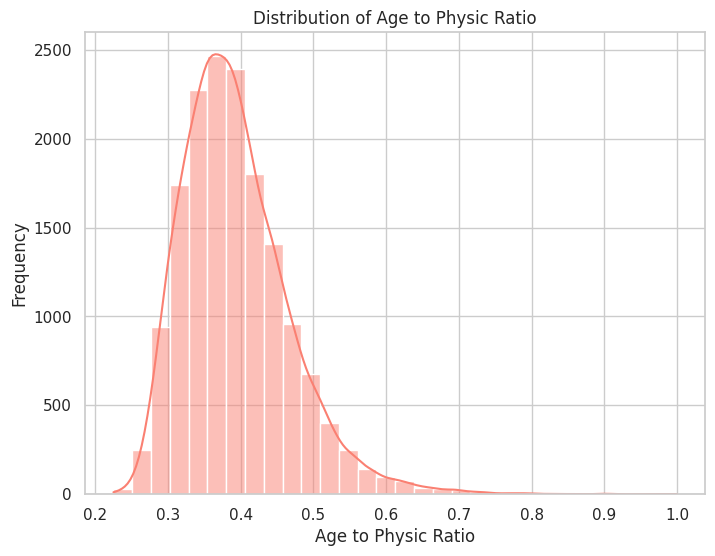

In [ ]:
# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for age_to_physic_ratio
sns.histplot(df_cleaned['age_to_physic_ratio'], bins=30, kde=True, color='salmon')

# Add titles and labels
plt.title('Distribution of Age to Physic Ratio')
plt.xlabel('Age to Physic Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Caractéristiques spécifiques au poste**

Attaquants : Les caractéristiques importantes pour les attaquants incluent généralement shooting, pace, dribbling, attacking_finishing, etc.

In [ ]:
df_cleaned['attacker_score'] = (df_cleaned['shooting'] * 0.4 + df_cleaned['pace'] * 0.3 + df_cleaned['dribbling'] * 0.3)


Milieux de terrain : Les milieux de terrain sont souvent jugés sur leur capacité à distribuer le ballon, leur vision du jeu, et leur agilité. ON peux donc utiliser des caractéristiques comme passing, dribbling, mentality_vision, et movement_balance.

In [ ]:
df_cleaned['midfielder_score'] = (df_cleaned['passing'] * 0.4 + df_cleaned['dribbling'] * 0.3 + df_cleaned['mentality_vision'] * 0.3)


Défenseurs : Les défenseurs sont jugés en grande partie sur leurs capacités défensives et leur physique. Il serait pertinent de prendre en compte defending, physic, defending_standing_tackle, defending_marking_awareness, et movement_reactions.

In [ ]:
df_cleaned['defender_score'] = (df_cleaned['defending'] * 0.4 + df_cleaned['physic'] * 0.3 + df_cleaned['defending_standing_tackle'] * 0.3)


Gardien de but : Les gardiens se jugent sur leurs performances en termes de réflexes, positionnement, et plongées. On peux utiliser des caractéristiques comme goalkeeping_diving, goalkeeping_handling, et goalkeeping_positioning

In [ ]:
df_cleaned['goalkeeper_score'] = (df_cleaned['goalkeeping_diving'] * 0.4 + df_cleaned['goalkeeping_handling'] * 0.3 + df_cleaned['goalkeeping_positioning'] * 0.3)


In [ ]:

# Fonction pour classifier les joueurs selon leur poste principal
def get_position(pos):
    if 'ST' in pos or 'LW' in pos or 'RW' in pos:
        return 'Attacker'
    elif 'CM' in pos or 'CAM' in pos or 'CDM' in pos:
        return 'Midfielder'
    elif 'CB' in pos or 'RB' in pos or 'LB' in pos:
        return 'Defender'
    elif 'GK' in pos:
        return 'Goalkeeper'
    else:
        return 'Other'

In [ ]:
# Appliquer la classification sur la colonne player_positions
df_cleaned['position'] = df_cleaned['player_positions'].apply(get_position)

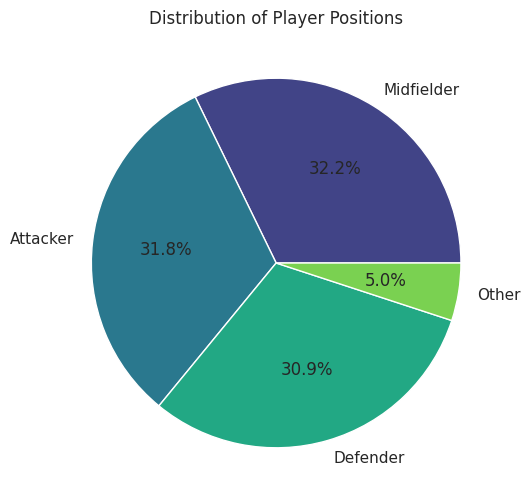

In [ ]:
# Count the number of players in each position category
position_counts = df_cleaned['position'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(position_counts)))
plt.title("Distribution of Player Positions")
plt.show()

In [ ]:

# Fonction pour attribuer le label "talented" en fonction du poste
def assign_talent(row):
    if row['position'] == 'Attacker' and row['attacker_score'] > 75:
        return 'Talented'
    elif row['position'] == 'Midfielder' and row['midfielder_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Defender' and row['defender_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Goalkeeper' and row['goalkeeper_score'] > 70:
        return 'Talented'
    else:
        return 'Not Talented'

# Appliquer la logique de talent
df_cleaned['talented'] = df_cleaned.apply(assign_talent, axis=1)




In [ ]:
print("Original dataset distribution:\n", df_cleaned['talented'].value_counts())


Original dataset distribution:
 talented
Not Talented    13183
Talented         2837
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

X = df_cleaned[['attacker_score', 'midfielder_score', 'defender_score', 'goalkeeper_score']]  # Features
y = df_cleaned['talented']  # Target

# Split data before applying SMOTEENN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("Before balancing:", y_train.value_counts())
print("After balancing:", pd.Series(y_resampled).value_counts())


Before balancing: talented
Not Talented    10524
Talented         2292
Name: count, dtype: int64
After balancing: talented
Talented        10115
Not Talented     9585
Name: count, dtype: int64


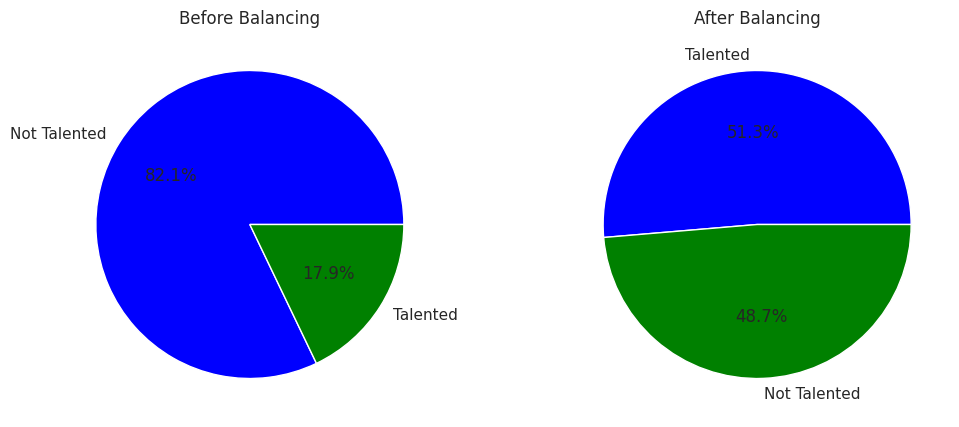

In [ ]:

# Count occurrences before and after balancing
before_counts = y_train.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart before balancing (percentages)
axes[0].pie(before_counts, labels=before_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[0].set_title("Before Balancing")

# Pie chart after balancing (percentages)
axes[1].pie(after_counts, labels=after_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[1].set_title("After Balancing")

plt.show()

In [ ]:
print(df_cleaned.columns)
print(df_cleaned.head())


Index(['short_name', 'height_cm', 'weight_kg', 'age', 'overall', 'potential',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_finishing', 'skill_dribbling', 'player_positions',
       'mentality_vision', 'mentality_composure', 'club_name', 'league_name',
       'preferred_foot', 'work_rate', 'body_type', 'release_clause_eur',
       'club_position', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_positioning',
       'potential_to_overall_ratio', 'age_to_physic_ratio', 'attacker_score',
       'midfielder_score', 'defender_score', 'goalkeeper_score', 'position',
       'talented'],
      dtype='object')
          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91

In [ ]:
# Convert 'talented' column to binary format
df_cleaned['talented'] = df_cleaned['talented'].map({'Talented': 1, 'Not Talented': 0})

In [ ]:
print(df_cleaned.head())


          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  goalkeeping_handling  \
0      92.0     91.0       95.0  ...                    11   
1      92.0     79.0       86.0  ...                     6   
2      94.0     80.0       88.0  ...                    11   
3      83.0     86.0       94.0  ...                     9   
4      86.0     93.0       88.0  ...                    13   

   goalkeeping_positioning  potential_to_overall_ratio  age_to_physic_ratio  \
0                       14                         1.0             0.523077   
1     

In [ ]:
df_cleaned['position'].unique()


array(['Attacker', 'Midfielder', 'Defender', 'Other'], dtype=object)

In [ ]:
# One-hot encode the 'position' column
position_encoded = pd.get_dummies(df_cleaned['position'], prefix='position')

# Convert boolean values to binary (1/0)
position_encoded = position_encoded.astype(int)

# Concatenate the new encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned, position_encoded], axis=1)

# Optionally drop the original 'position' column
df_cleaned.drop('position', axis=1, inplace=True)


In [ ]:
print(df_cleaned.head())


          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  age_to_physic_ratio  attacker_score  \
0      92.0     91.0       95.0  ...             0.523077            90.8   
1      92.0     79.0       86.0  ...             0.390244            86.0   
2      94.0     80.0       88.0  ...             0.480000            90.1   
3      83.0     86.0       94.0  ...             0.460317            88.7   
4      86.0     93.0       88.0  ...             0.384615            83.6   

   midfielder_score  defender_score goalkeeper_score  talented  \
0       

In [ ]:
# Sauvegarde du fichier CSV
df_cleaned.to_csv('players_with_talent.csv', index=False)